### Import libraries

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('emails.csv')

In [6]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


#### Imput Data

In [7]:
x = df.drop(['Email No.','Prediction'], axis = 1)

#### Output Data

In [9]:
y = df['Prediction']

#### Feature Scalling

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x)

In [13]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

#### Cross validation

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, random_state = 0, test_size = 0.25
)

In [17]:
x_train.shape

(3879, 3000)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [20]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
y_pred = knn.predict(x_test)

In [22]:

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

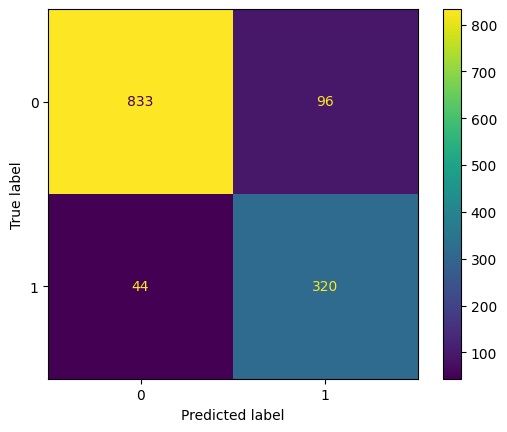

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [26]:
accuracy_score(y_test, y_pred)

0.8917246713070379

### Suport Vector machine

In [27]:
from sklearn.svm import SVC

In [28]:
svm = SVC(kernel = 'linear')

In [29]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [30]:
y_pred = svm.predict(x_test)

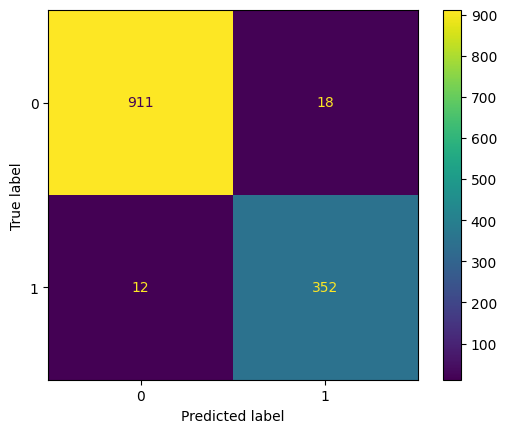

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [32]:
accuracy_score(y_test, y_pred)

0.9767981438515081

In [33]:


import numpy as np

In [34]:
error = []

for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))

In [35]:
error

[0.10827532869296211,
 0.10982211910286156,
 0.12296983758700696,
 0.11523588553750967,
 0.12838360402165508,
 0.1214230471771075,
 0.15158546017014696,
 0.14849187935034802,
 0.17246713070378963,
 0.16705336426914152,
 0.1871616395978345,
 0.18329466357308585,
 0.21500386697602475,
 0.21345707656612528,
 0.22815158546017014,
 0.2266047950502707,
 0.23588553750966745,
 0.23356535189481825,
 0.2459396751740139,
 0.24361948955916474,
 0.2559938128383604,
 0.2552204176334107,
 0.2699149265274555,
 0.2691415313225058,
 0.2822892498066512,
 0.28306264501160094,
 0.2954369682907966,
 0.2923433874709977,
 0.3039443155452436,
 0.300077339520495,
 0.30549110595514306,
 0.30549110595514306,
 0.31245166279969067,
 0.31245166279969067,
 0.3194122196442382,
 0.317092034029389,
 0.32637277648878577,
 0.32559938128383603,
 0.33410672853828305,
 0.3325599381283836]